In [3]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import LabelEncoder,StandardScaler
df=pd.read_csv('laptop price linear data set.csv')
df

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($)
0,Apple,AMD Ryzen 3,64,512GB SSD,Nvidia GTX 1650,17.3,2560x1440,8.9,1.42,FreeDOS,3997.07
1,Razer,AMD Ryzen 7,4,1TB SSD,Nvidia RTX 3080,14.0,1366x768,9.4,2.57,Linux,1355.78
2,Asus,Intel i5,32,2TB SSD,Nvidia RTX 3060,13.3,3840x2160,8.5,1.74,FreeDOS,2673.07
3,Lenovo,Intel i5,4,256GB SSD,Nvidia RTX 3080,13.3,1366x768,10.5,3.10,Windows,751.17
4,Razer,Intel i3,4,256GB SSD,AMD Radeon RX 6600,16.0,3840x2160,5.7,3.38,Linux,2059.83
...,...,...,...,...,...,...,...,...,...,...,...
11763,Acer,Intel i3,4,2TB SSD,Nvidia RTX 2060,17.3,1366x768,11.5,1.58,macOS,704.82
11764,Asus,Intel i3,4,2TB SSD,AMD Radeon RX 6800,16.0,1366x768,9.5,2.14,Linux,775.59
11765,Razer,AMD Ryzen 9,4,2TB SSD,AMD Radeon RX 6600,15.6,2560x1440,8.2,2.05,Linux,2789.46
11766,Samsung,AMD Ryzen 7,16,512GB SSD,Integrated,13.3,1920x1080,7.5,1.48,macOS,1067.13


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 605 entries, 8 to 11744
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 605 non-null    int64  
 1   Processor             605 non-null    int64  
 2   RAM (GB)              605 non-null    int64  
 3   Storage               605 non-null    int64  
 4   GPU                   605 non-null    int64  
 5   Screen Size (inch)    605 non-null    float64
 6   Resolution            605 non-null    int64  
 7   Battery Life (hours)  605 non-null    float64
 8   Weight (kg)           605 non-null    float64
 9   Operating System      605 non-null    int64  
 10  Price ($)             605 non-null    float64
dtypes: float64(4), int64(7)
memory usage: 56.7 KB


In [5]:
df.isnull().sum()

Brand                   0
Processor               0
RAM (GB)                0
Storage                 0
GPU                     0
Screen Size (inch)      0
Resolution              0
Battery Life (hours)    0
Weight (kg)             0
Operating System        0
Price ($)               0
dtype: int64

In [29]:
le=LabelEncoder()
df['Brand']=le.fit_transform(df['Brand'])
df['Processor']=le.fit_transform(df['Processor'])
df['Storage']=le.fit_transform(df['Storage'])
df['GPU']=le.fit_transform(df['GPU'])
df['Operating System']=le.fit_transform(df['Operating System'])
df['Resolution']=le.fit_transform(df['Resolution'])


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15248\4278487301.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Brand']=le.fit_transform(df['Brand'])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15248\4278487301.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Processor']=le.fit_transform(df['Processor'])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15248\4278487301.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

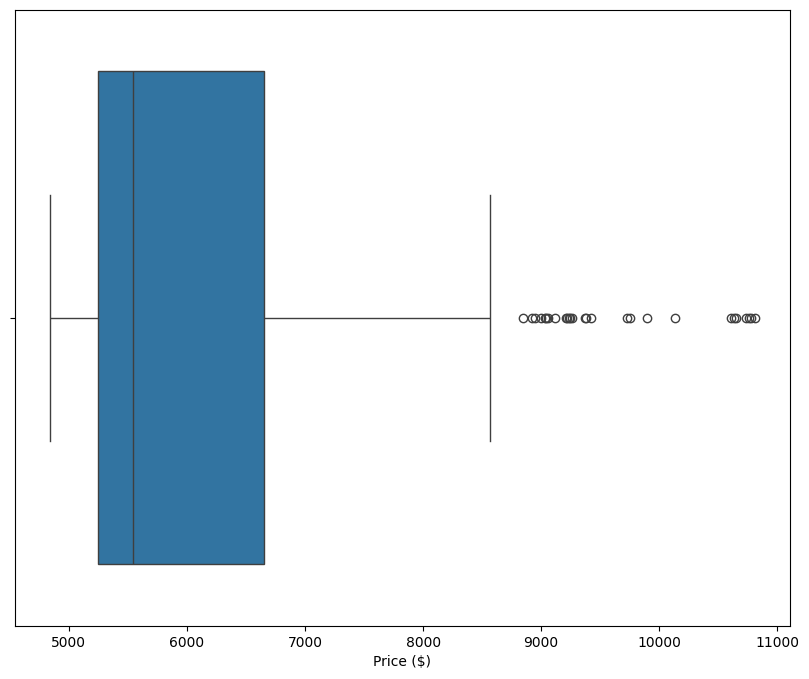

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.boxplot(x=df['Price ($)'])
plt.show()

In [32]:
Q1=df['Price ($)'].quantile(0.25)
Q3=df['Price ($)'].quantile(0.75)
IQR=Q3-Q1
print(IQR)
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
print(lower_bound)
print(upper_bound)
outliers=[(df['Price ($)']<lower_bound)|(df['Price ($)']>upper_bound)]
print(outliers)

1407.2299999999996
3135.6150000000007
8764.535
[8        False
43       False
64       False
102      False
114      False
         ...  
11664    False
11685     True
11709    False
11720    False
11744    False
Name: Price ($), Length: 605, dtype: bool]


In [33]:
df=df[~((df['Price ($)']>=(Q1-1.5*IQR))&(df['Price ($)']<(Q3+1.5*IQR)))]

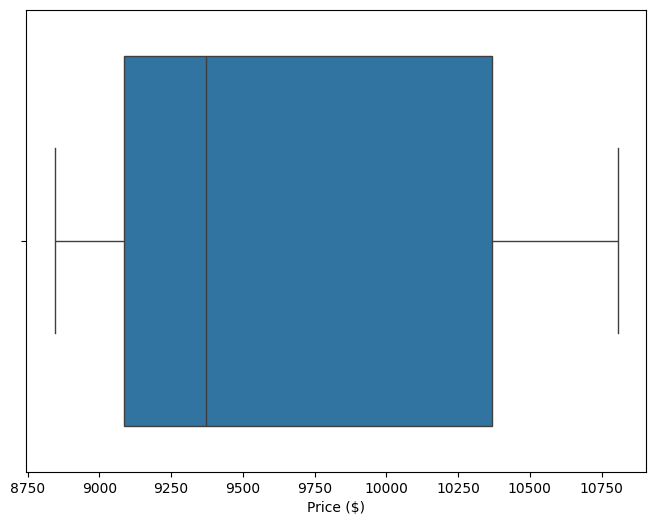

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.boxplot(x=df['Price ($)'])
plt.show()

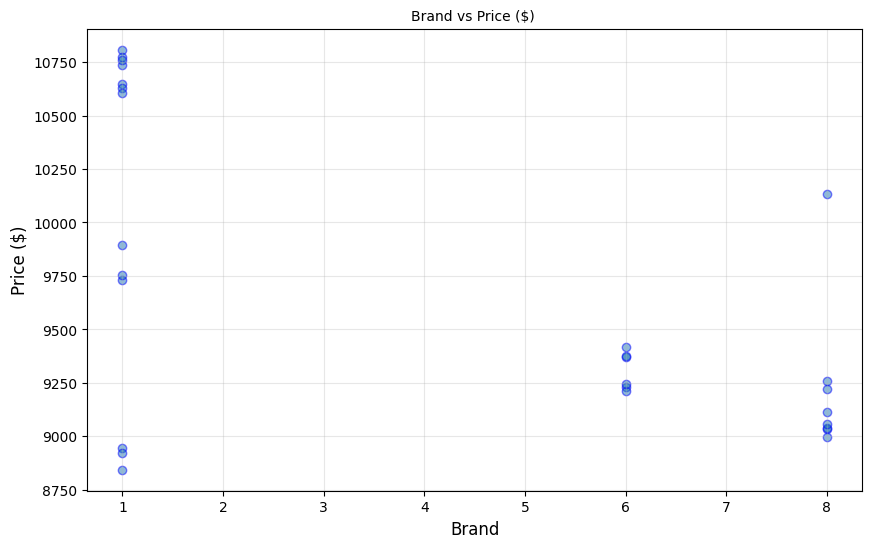

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(df['Brand'],df['Price ($)'],alpha=0.5,edgecolors='b')
plt.title("Brand vs Price ($) ",fontsize=10)
plt.xlabel("Brand",fontsize=12)
plt.ylabel("Price ($)",fontsize=12)
plt.grid(alpha=0.3)
plt.show()

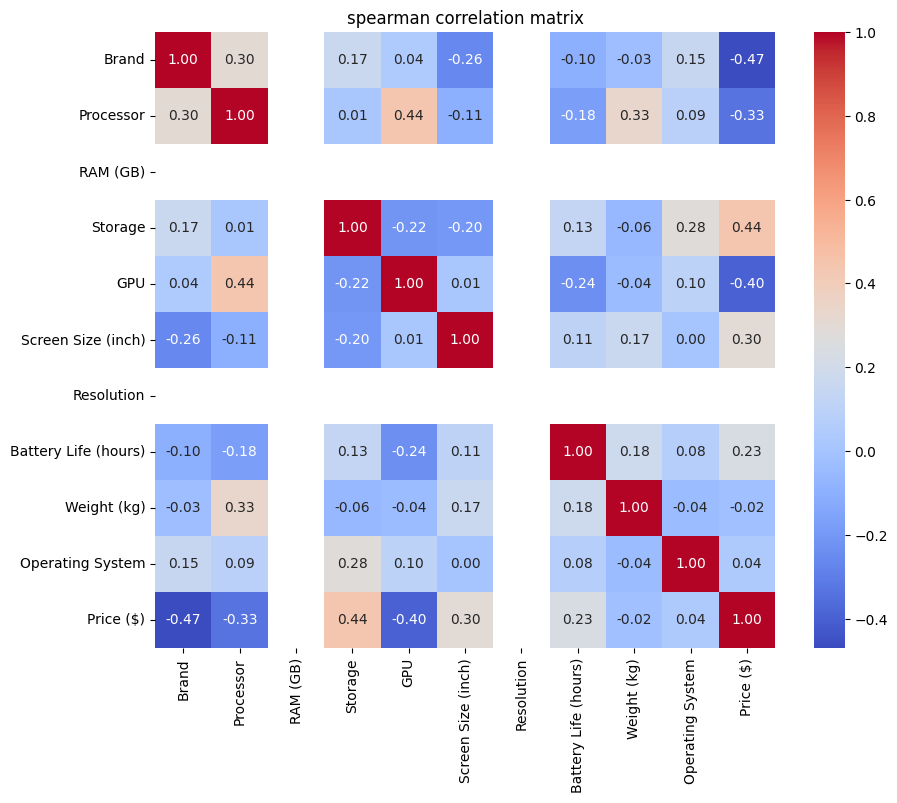

In [37]:
import seaborn as sns
plt.figure(figsize=(10,8))
spearman_corr=df.corr(method='spearman')
sns.heatmap(spearman_corr, annot=True,fmt=".2f",cmap='coolwarm',cbar=True)
plt.title('spearman correlation matrix')
plt.show()

In [38]:
df.corr()

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($)
Brand,1.000000,0.319758,NaN,0.112747,0.088612,-0.238500,NaN,-0.028035,0.028655,0.122584,-0.586375
Processor,0.319758,1.000000,NaN,0.031204,0.444794,-0.106380,NaN,-0.184693,0.320418,0.035956,-0.323439
RAM (GB),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Storage,0.112747,0.031204,NaN,1.000000,-0.209913,-0.186557,NaN,0.203738,0.058022,0.299007,0.468200
GPU,0.088612,0.444794,NaN,-0.209913,1.000000,0.046651,NaN,-0.332940,-0.082677,0.108639,-0.381215
Screen Size (inch),-0.238500,-0.106380,NaN,-0.186557,0.046651,1.000000,NaN,0.031086,0.105674,-0.042840,0.293810
Resolution,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Battery Life (hours),-0.028035,-0.184693,NaN,0.203738,-0.332940,0.031086,NaN,1.000000,0.225092,0.111764,0.186447
Weight (kg),0.028655,0.320418,NaN,0.058022,-0.082677,0.105674,NaN,0.225092,1.000000,-0.109896,0.064290
Operating System,0.122584,0.035956,NaN,0.299007,0.108639,-0.042840,NaN,0.111764,-0.109896,1.000000,0.023694


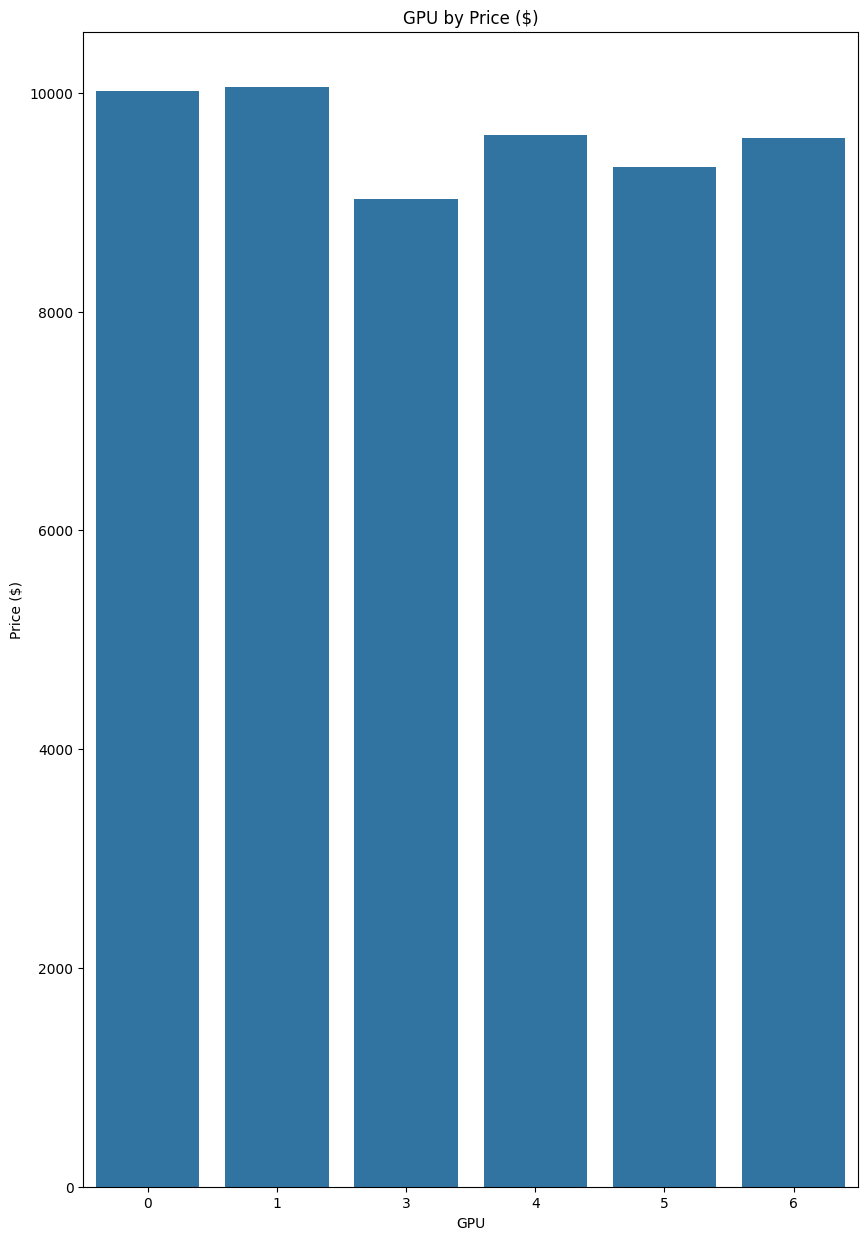

In [40]:
plt.figure(figsize=(10,15))
sns.barplot(x='GPU', y='Price ($)',data=df,errorbar=None)
plt.title("GPU by Price ($)")
plt.xlabel("GPU")
plt.ylabel("Price ($)")
plt.show()

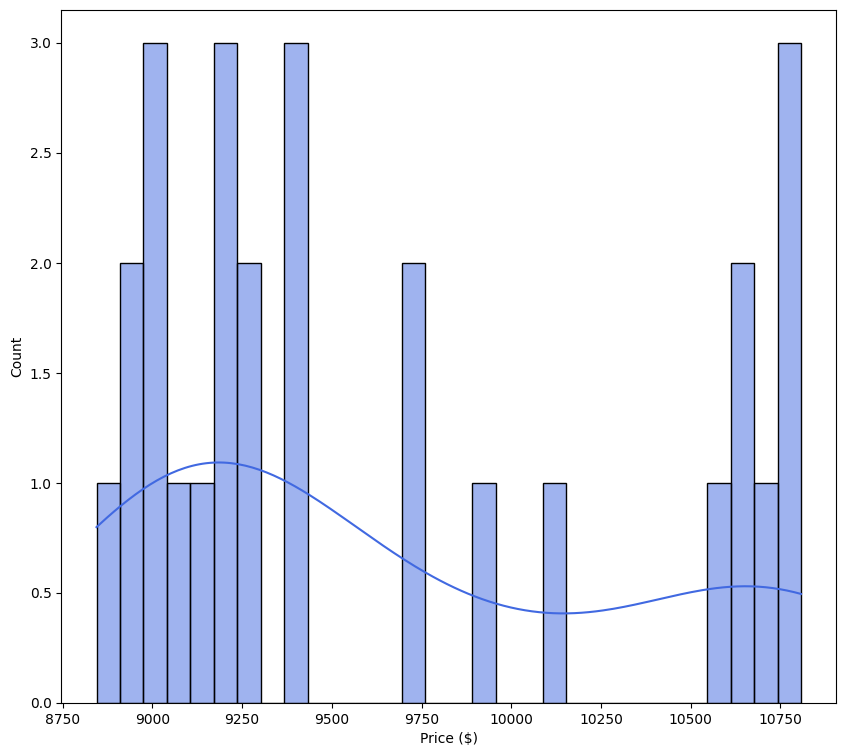

In [42]:
plt.figure(figsize=(10,9))
sns.histplot(df['Price ($)'].dropna(),bins=30,kde=True,color='royalblue')
plt.show()

<Axes: xlabel='GPU', ylabel='Price ($)'>

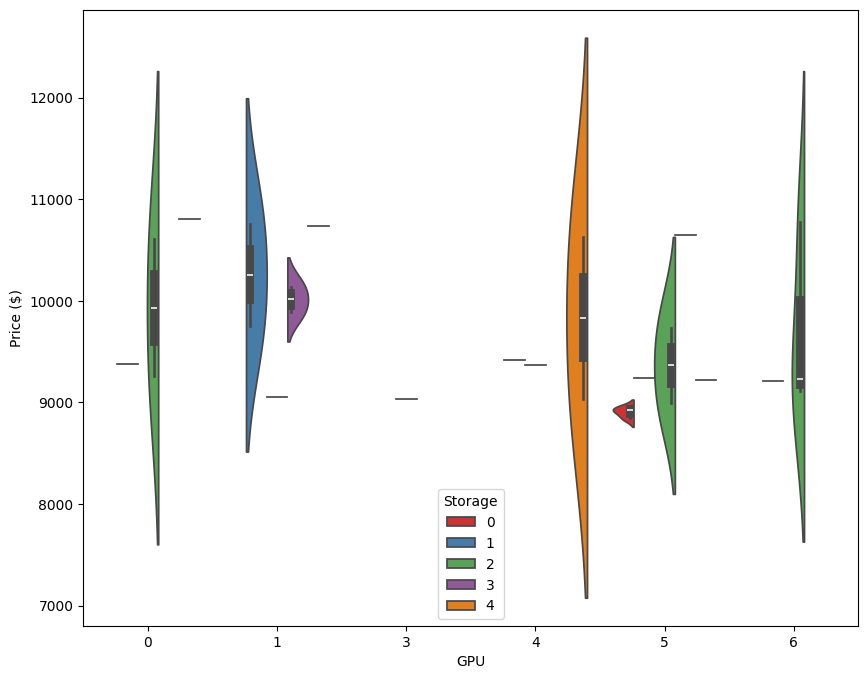

In [43]:
plt.figure(figsize=(10,8))
sns.violinplot(x='GPU',y='Price ($)',hue='Storage',data=df,split=True,palette='Set1')

<Axes: xlabel='GPU', ylabel='Price ($)'>

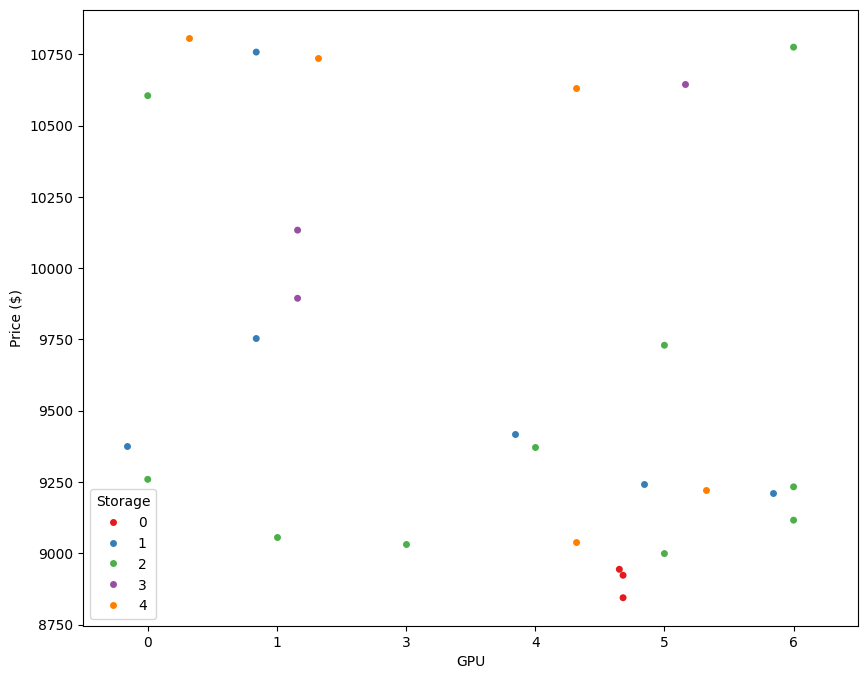

In [44]:
plt.figure(figsize=(10,8))
sns.swarmplot(x='GPU',y='Price ($)',hue='Storage',data=df,palette="Set1",dodge=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15248\424861681.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df['Price ($)'].dropna(),color='skyblue',shade=True)


<Axes: xlabel='Price ($)', ylabel='Density'>

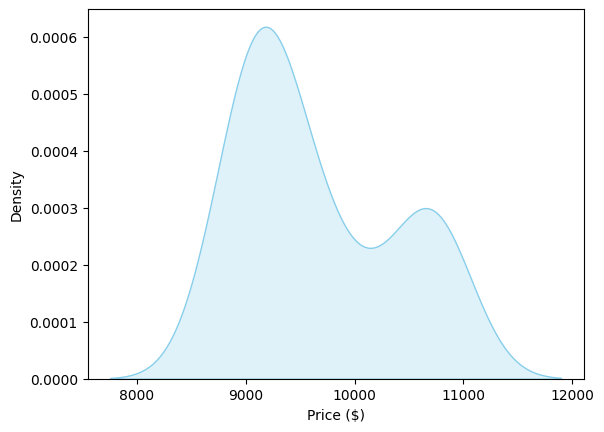

In [45]:
import seaborn as sns
sns.kdeplot(data=df['Price ($)'].dropna(),color='skyblue',shade=True)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 282 to 11685
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 27 non-null     int64  
 1   Processor             27 non-null     int64  
 2   RAM (GB)              27 non-null     int64  
 3   Storage               27 non-null     int64  
 4   GPU                   27 non-null     int64  
 5   Screen Size (inch)    27 non-null     float64
 6   Resolution            27 non-null     int64  
 7   Battery Life (hours)  27 non-null     float64
 8   Weight (kg)           27 non-null     float64
 9   Operating System      27 non-null     int64  
 10  Price ($)             27 non-null     float64
dtypes: float64(4), int64(7)
memory usage: 2.5 KB
